In [25]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm

In [26]:
X = np.array([1, 5, 1.5, 8, 1, 9, 7, 8.7, 2.3, 5.5, 7.7, 6.1])
y = np.array([2, 8, 1.8, 8, 0.6, 11, 10, 9.4, 4, 3, 8.8, 7.5])

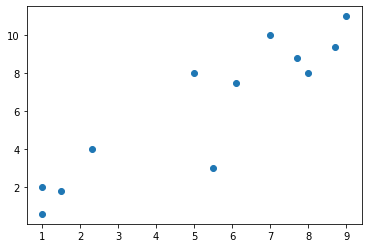

In [27]:
plt.scatter(X, y)
plt.show()


In [28]:
training_X = np.vstack((X, y)).T
training_y = [0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1]

In [29]:
# define the model
clf = svm.SVC(kernel='linear', C=1.0)

In [30]:
# train the model
clf.fit(training_X, training_y)

SVC(kernel='linear')

In [31]:
print("Support Vectors:")
print(clf.support_vectors_)


Support Vectors:
[[2.3 4. ]
 [5.5 3. ]
 [6.1 7.5]]


No handles with labels found to put in legend.


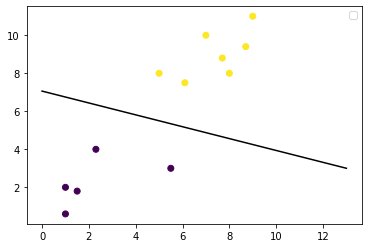

In [32]:
# get the weight values for the linear equation from the trained SVM model
w = clf.coef_[0]

# get the y-offset for the linear equation
a = -w[0] / w[1]

# make the x-axis space for the data points
XX = np.linspace(0, 13)

# get the y-values to plot the decision boundary
yy = a * XX - clf.intercept_[0] / w[1]

# plot the decision boundary
plt.plot(XX, yy, 'k-')

# show the plot visually
plt.scatter(training_X[:, 0], training_X[:, 1], c=training_y)
plt.legend()
plt.show()

In [33]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {'C': [0.001, 0.01, 0.1, 1, 5, 10, 100]}

# Perform grid search
grid_search = GridSearchCV(svm.SVC(kernel='linear'), param_grid, cv=5)
grid_search.fit(training_X, training_y)

# Get the best value of C
best_C = grid_search.best_params_['C']
print("Best value of C:", best_C)


Best value of C: 0.01


In [34]:
# Redefine the model with a lower value of C
clf_low_C = svm.SVC(kernel='linear', C=0.1)

# Fit the model to the training data with the reduced cost parameter
clf_low_C.fit(training_X, training_y)


SVC(C=0.1, kernel='linear')

No handles with labels found to put in legend.


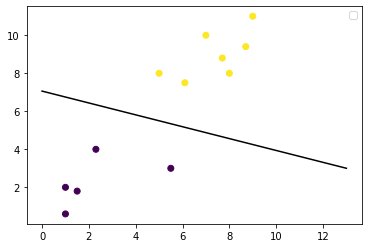

In [35]:
# get the weight values for the linear equation from the trained SVM model
w = clf_low_C.coef_[0]

# get the y-offset for the linear equation
a = -w[0] / w[1]

# make the x-axis space for the data points
XX = np.linspace(0, 13)

# get the y-values to plot the decision boundary
yy = a * XX - clf_low_C.intercept_[0] / w[1]

# plot the decision boundary
plt.plot(XX, yy, 'k-')

# show the plot visually
plt.scatter(training_X[:, 0], training_X[:, 1], c=training_y)
plt.legend()

In [14]:
# Access the cross-validation errors for each value of C
cv_errors = grid_search.cv_results_['mean_test_score']
print("Cross-validation errors for each value of C:")
print(cv_errors)


Cross-validation errors for each value of C:
[0.56666667 1.         1.         1.         1.         1.
 1.        ]


In [38]:
# Generate a test data set of 20 points
test_X = np.random.rand(20, 2) * 10
print("Test data set:")
print(test_X)


Test data set:
[[0.99166207 5.9697465 ]
 [5.14745042 6.73638262]
 [6.52926989 3.0696862 ]
 [3.99528074 5.48113235]
 [5.38027772 2.9561496 ]
 [7.48293028 4.55843384]
 [1.58154552 5.79192716]
 [6.27993051 5.82497559]
 [1.78635301 0.83369763]
 [3.45196835 6.47760502]
 [8.70199306 3.54418805]
 [0.59787896 7.91508664]
 [3.73201558 8.09801387]
 [2.32241939 3.65287792]
 [6.52929063 7.90467539]
 [8.25977771 3.15008252]
 [0.46501828 3.49762596]
 [4.68832    1.62391973]
 [9.12142888 6.43308533]
 [8.40000125 5.08715768]]


In [39]:
# Predict the class labels for the test points
predicted_labels = clf.predict(test_X)

# Count the number of points classified properly
correctly_classified = np.sum(predicted_labels == 1)  # Assuming class 1 is the positive class
print("Number of points classified properly:", correctly_classified)


Number of points classified properly: 8


In [40]:
# Print the number of support vectors
print("Number of support vectors:", np.sum(clf.n_support_))


Number of support vectors: 3
